<a href="https://colab.research.google.com/github/sanmevv/Multilingual-Tweet-Sentiment/blob/main/tweet_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/nlp_data.csv')

<ipython-input-2-b014deae8786>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/nlp_data.csv')


In [52]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=faea7f9a39361f779090ca793903a7f9c7c0f5f1f2db8a9453b17312576589cc
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [3]:
df

,Unnamed: 0,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url
0,0,SharazwrJ,1646231631747743761,2023-04-12 19:19:41,The true turning point came during the FIFA Wo...,Twitter for iPhone,en,9.279581e+17,Sulaymani,International Studies Graduate at @auisofficia...,0.0,0.0,0.0,[],217.0,175.0,969.0,https://twitter.com/SharazwrJ/status/164623163...
1,1,rumblegaming,1646226764295725058,2023-04-12 19:00:20,Altered State Machine and FIFA have partnered ...,Hootsuite Inc.,en,1.106633e+18,"Toronto, Ontario",Esports and Influencer Media & Talent Agency |...,0.0,0.0,0.0,"['#esportsnews', '#esports', '#RumbleGaming']",289.0,435.0,1301.0,https://twitter.com/rumblegaming/status/164622...
2,2,DSherryTweets,1646214277211238400,2023-04-12 18:10:43,Some vibes from Fifa World Cup 2022. #QatarWor...,Twitter for Android,en,2.206418e+09,Pakistan,Corporate Finance | Macroeconomics | QMUL | Br...,0.0,0.0,3.0,['#QatarWorldCup2022'],967.0,344.0,2664.0,https://twitter.com/DSherryTweets/status/16462...
3,3,FortressFooty,1646204825644810249,2023-04-12 17:33:10,MESSI NOMINATED FOR LAUREUS AWARD\nThe #Laureu...,Twitter for Android,en,1.017388e+18,South Africa,"Covering the beautiful game from every angle, ...",0.0,0.0,0.0,"['#Laureus23', '#Messi𓃵']",77.0,16.0,369.0,https://twitter.com/FortressFooty/status/16462...
4,4,ha58337112,1646201529391513600,2023-04-12 17:20:04,"World Cup 2022 Morocco vs. France start time, ...",Twitter Web App,en,1.580926e+18,NaN,"🏅China's Top Jersey🎖\nMen's, Women's And Youth...",0.0,0.0,0.0,[],15.0,1.0,2005.0,https://twitter.com/ha58337112/status/16462015...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179676,144352,L5d,533066305600225280,2014-11-14 01:18:05,双语新闻学英语：国际足联内部对腐败指控意见分歧 http://t.co/TVwTVLXyUP...,IFTTT,zh,4.654749e+07,Germany,"Ehem. Stip. von “Writer in Exil”, 法学家，政治学家，德国注...",0.0,0.0,0.0,[],565.0,47275.0,272983.0,https://twitter.com/L5d/status/533066305600225280
179677,144353,FTChinese,475921577670762496,2014-06-09 08:45:20,"赞助商施压国际足联调查卡塔尔: 罗格•布里茨,西梅昂•克尔伦敦,多哈报道\n 世界杯(Wor...",twitterfeed,zh,2.506731e+07,NaN,FT中文网是英国《金融时报》集团旗下唯一的中文商业财经网站，旨在为中国商业菁英和决策者们提供...,0.0,0.0,0.0,[],112.0,553814.0,27453.0,https://twitter.com/FTChinese/status/475921577...
179678,144354,runningkenko,435129344902459392,2014-02-16 19:11:34,"Qatar could lose 2022 World Cup, FIFA employee...",Sports Xpress Online,zh,1.616005e+08,Global,"Sports News,Topics and Information",0.0,0.0,0.0,[],3022.0,2409.0,77097.0,https://twitter.com/runningkenko/status/435129...
179679,144355,ChauGuo,10633631265460224,2010-12-03 09:57:09,布拉特承认足球起源于中国。Watching 2018 And 2022 FIFA World...,Twitter Web Client,zh,1.908580e+08,Boston,Traffic Engineer 自由思考&自由言论 Manager of Tutor In...,0.0,0.0,0.0,['#WorldCup'],171.0,53.0,758.0,https://twitter.com/ChauGuo/status/10633631265...


In [4]:
df.shape

(179681, 18)

In [5]:
df.columns

Index(['Unnamed: 0', 'Username', 'Tweet_id', 'Date', 'Tweet', 'Source',
       'Language', 'User_id', 'Location', 'Acctdesc', 'Replies', 'Retweets',
       'Likes', 'Hashtags', 'Following', 'Followers', 'Total_tweets', 'Url'],
      dtype='object')

In [6]:
df.duplicated().sum()

35315

In [7]:
df.isnull().sum()

Unnamed: 0          3
Username            0
Tweet_id            0
Date                0
Tweet               0
Source              0
Language        35317
User_id         35317
Location        75973
Acctdesc        46219
Replies         35331
Retweets        35331
Likes           35331
Hashtags        35331
Following       35331
Followers       35331
Total_tweets    35331
Url             35331
dtype: int64

In [8]:
df.drop(df.columns[0], axis=1, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179681 entries, 0 to 179680
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Username      179681 non-null  object 
 1   Tweet_id      179681 non-null  object 
 2   Date          179681 non-null  object 
 3   Tweet         179681 non-null  object 
 4   Source        179681 non-null  object 
 5   Language      144364 non-null  object 
 6   User_id       144364 non-null  float64
 7   Location      103708 non-null  object 
 8   Acctdesc      133462 non-null  object 
 9   Replies       144350 non-null  float64
 10  Retweets      144350 non-null  float64
 11  Likes         144350 non-null  float64
 12  Hashtags      144350 non-null  object 
 13  Following     144350 non-null  float64
 14  Followers     144350 non-null  float64
 15  Total_tweets  144350 non-null  float64
 16  Url           144350 non-null  object 
dtypes: float64(7), object(10)
memory usage: 23.3+ MB

In [10]:
df.describe()

,User_id,Replies,Retweets,Likes,Following,Followers,Total_tweets
count,1.443640e+05,144350.000000,144350.000000,144350.000000,144350.000000,1.443500e+05,1.443500e+05
mean,6.352554e+17,1.731576,5.365736,29.011694,1846.738781,3.454678e+05,8.450612e+04
std,6.614337e+17,47.486298,105.986204,565.239145,17560.019318,1.496757e+06,1.889080e+05
min,2.550000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
25%,4.372686e+08,0.000000,0.000000,0.000000,44.000000,1.560000e+02,2.671000e+03
50%,4.861841e+09,0.000000,0.000000,1.000000,257.000000,1.171000e+03,1.512600e+04
75%,1.320302e+18,0.000000,1.000000,4.000000,908.000000,2.201900e+04,7.457575e+04
max,1.642409e+18,7776.000000,23959.000000,83880.000000,664604.000000,6.132209e+07,7.376314e+06


In [11]:
df.nunique()

Username         60155
Tweet_id        144362
Date            128547
Tweet           142801
Source             745
Language            32
User_id          60156
Location         18144
Acctdesc         52608
Replies            279
Retweets           587
Likes             1343
Hashtags         49981
Following         5879
Followers        14074
Total_tweets     29030
Url             144350
dtype: int64

In [12]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [13]:
most_frequent_values(df)

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url
Total,179681,179681,179681,179681,179681,144364,144364,103708,133462,144350,144350,144350,144350,144350,144350,144350,144350
Most frequent item,Twitter for Android,en,118047540,"Doha , Qatar",Twitter for Android,ar,304982427.0,"Doha, Qatar",#قنوات_الكاس,0.0,0.0,0.0,[],8.0,0.0,166887.0,https://twitter.com/SharazwrJ/status/164623163...
Frequence,35317,35317,23101,23101,44438,50000,2715,4504,2715,110032,101677,66677,38347,6327,1596,848,1
Percent from total,19.655,19.655,12.857,12.857,24.732,34.635,1.881,4.343,2.034,76.226,70.438,46.191,26.565,4.383,1.106,0.587,0.001


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df['Language'].unique()

array(['en', 'vi', 'et', '77', '115', '82', 'in', 'es', 'de', 'fr', '204',
       'nl', nan, '667', 'cs', 'sv', 'tr', '409', 'da', 'eu', 'ca', 'no',
       'tl', 'pt', 'hi', 'it', 'und', 'pl', 'ht', 'ar', '140', 'ru', 'zh'],
      dtype=object)

In [16]:
df['Language'].value_counts()

ar     50000
en     49922
es     34112
fr      9020
zh       494
ru       394
hi       169
ca       118
it        44
in        23
vi        17
et        17
eu         7
nl         4
tr         3
sv         2
und        2
de         2
pt         1
ht         1
140        1
pl         1
82         1
tl         1
no         1
da         1
cs         1
667        1
204        1
77         1
115        1
409        1
Name: Language, dtype: int64

In [31]:
languages_to_keep = ['en', 'es', 'ar', 'fr', 'zh', 'ru']
mask = df['Language'].isin(languages_to_keep)
df = df[mask]

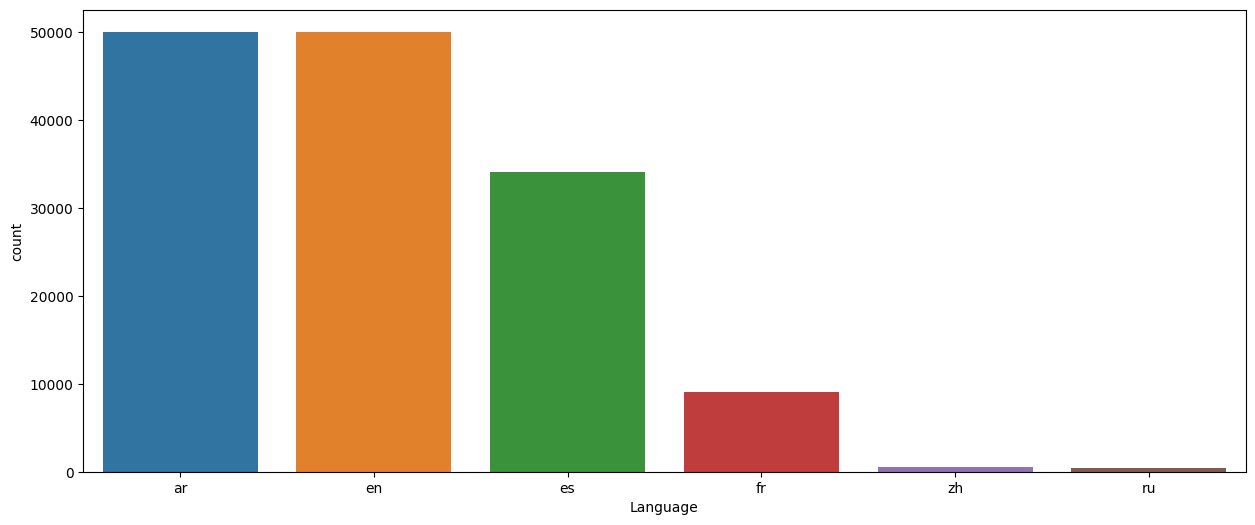

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.show()

In [33]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [35]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_stopwords(lang):
    stopwords_dict = {
        'arabic': set(stopwords.words('arabic')),
        'english': set(stopwords.words('english')),
        'spanish': set(stopwords.words('spanish')),
        'french': set(stopwords.words('french')),
        'german': set(stopwords.words('german')),
        'russian': set(stopwords.words('russian')),
    }
    common_stopwords = set(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    stopwords_dict[lang].update(common_stopwords)
    return stopwords_dict[lang]

def show_wordcloud(data, lang, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = get_stopwords(lang)
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500, mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
print(nltk.corpus.stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


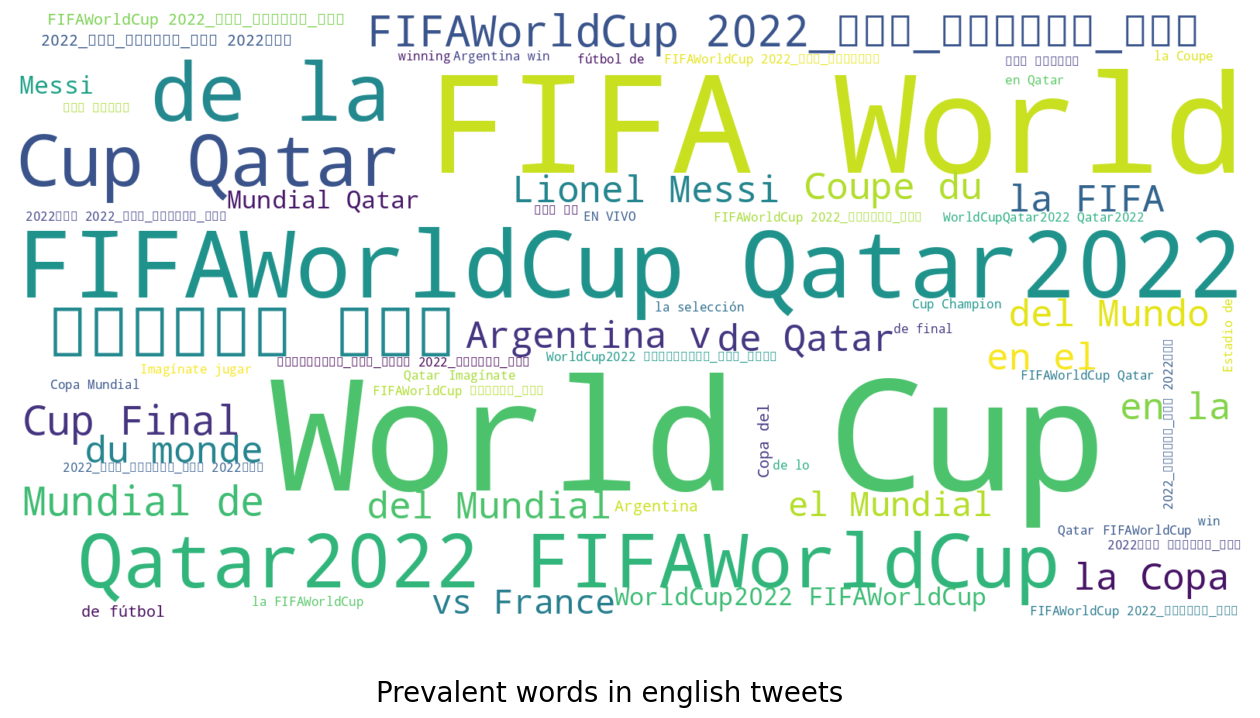

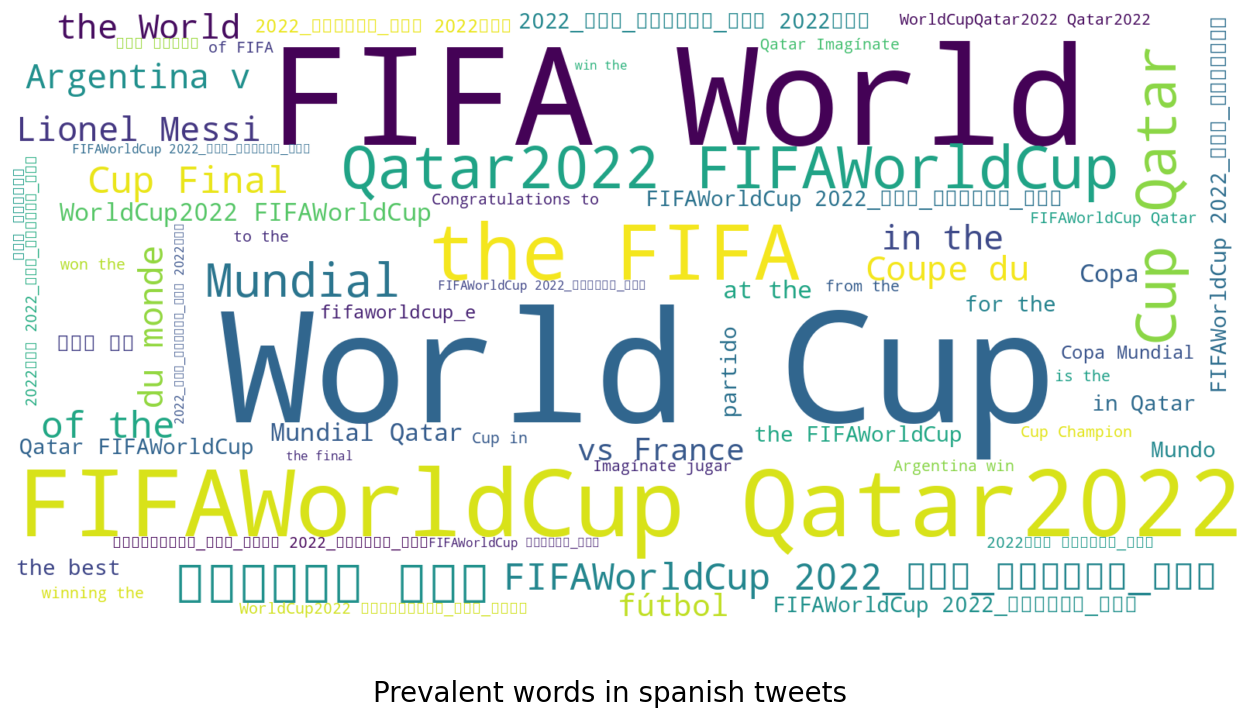

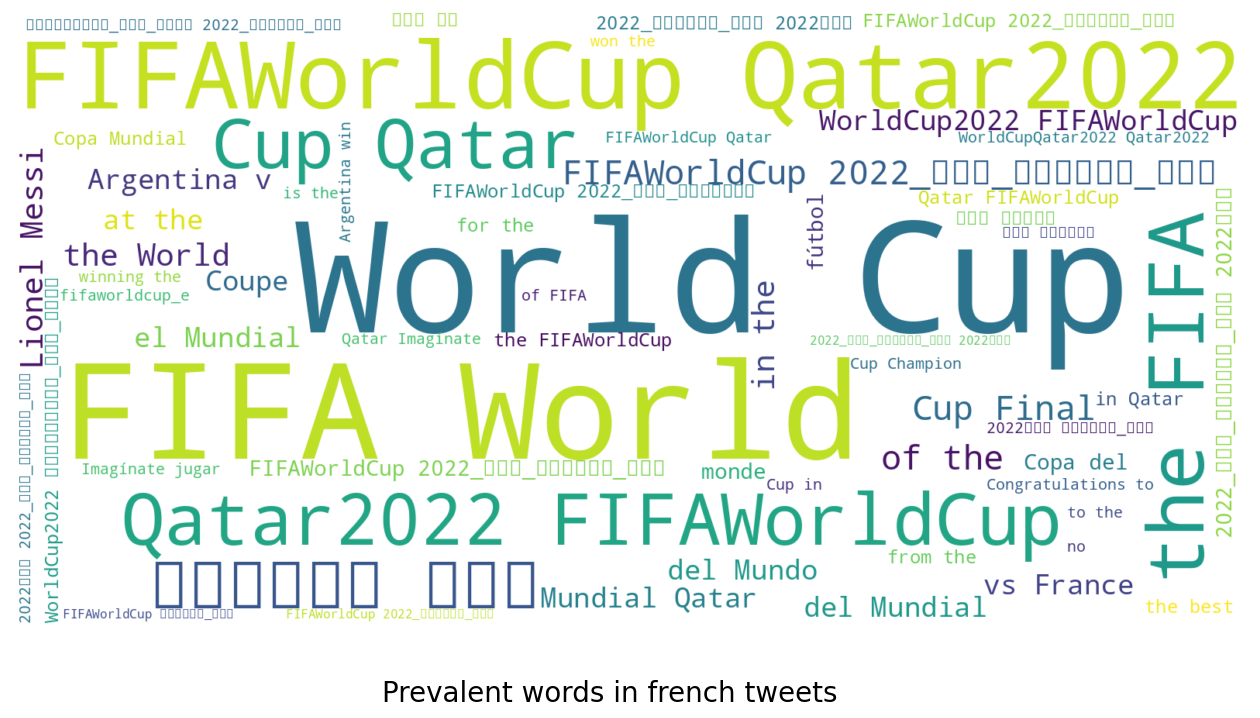

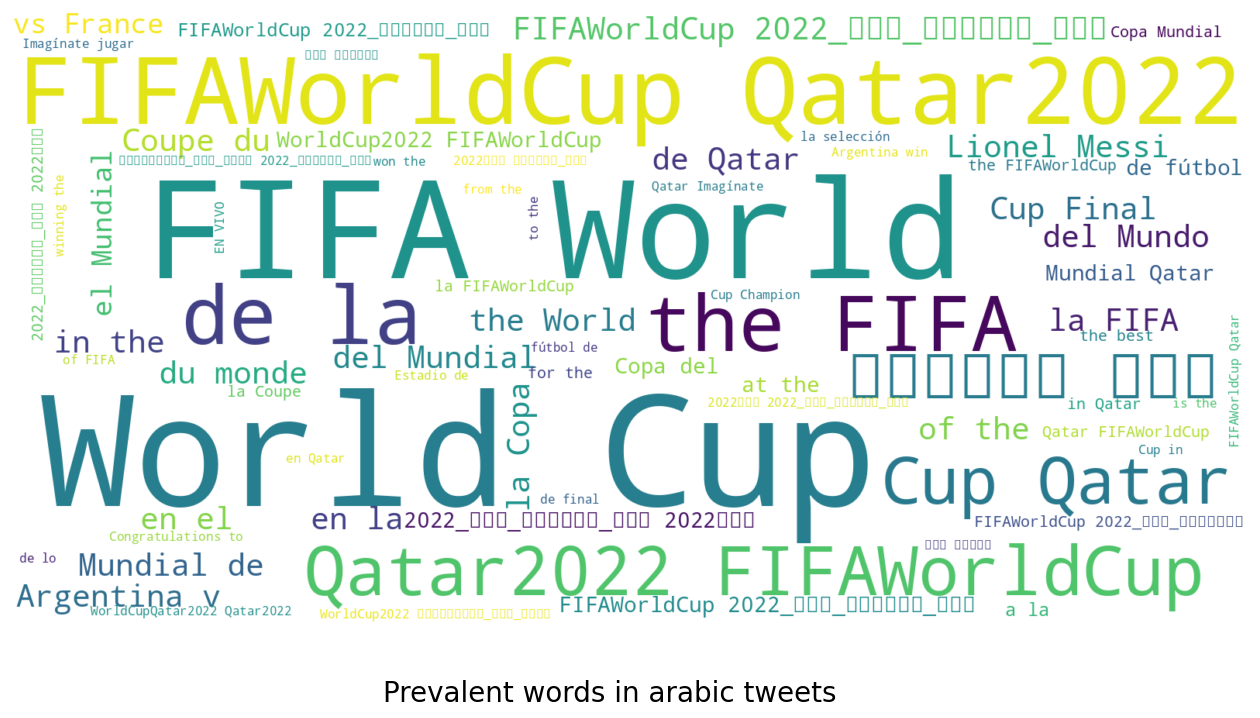

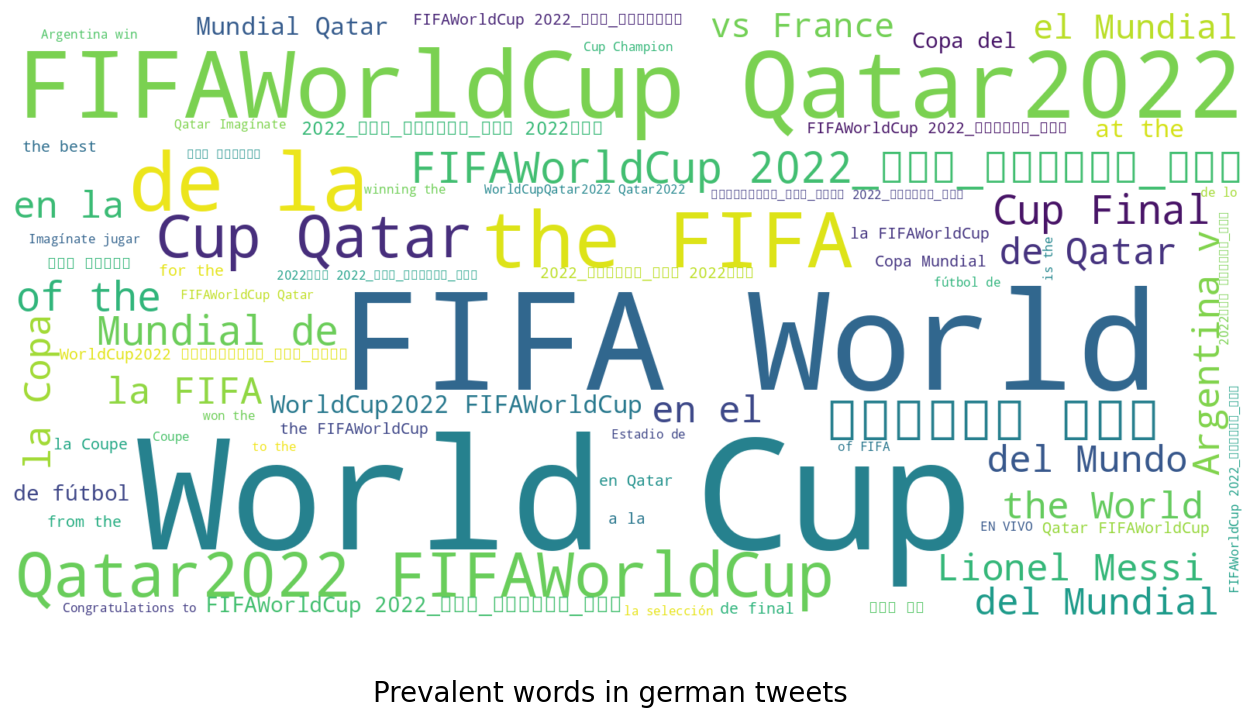

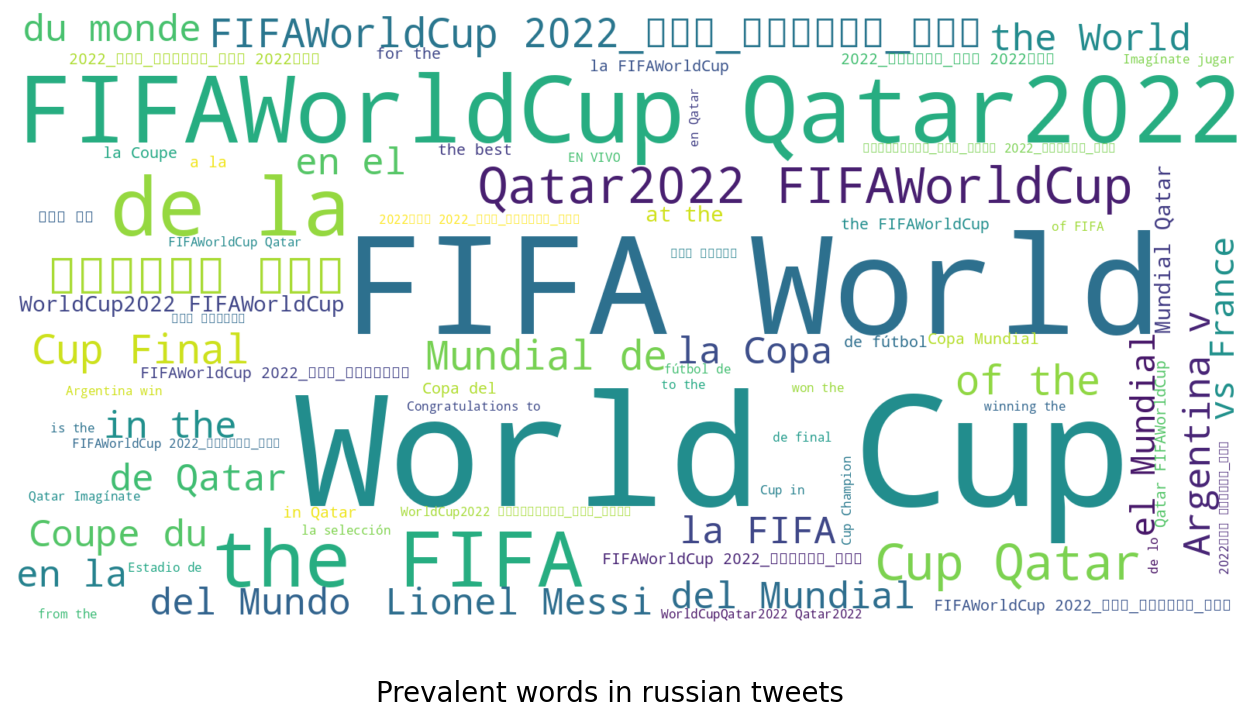

In [61]:
languages = ['english', 'spanish', 'french', 'arabic', 'german', 'russian']
for lang in languages:
    show_wordcloud(df['Tweet'], lang=lang, title=f"Prevalent words in {lang} tweets")


In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [42]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [45]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1,color = colors)
    percent.plot(kind='bar', ax=ax2,color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

<ipython-input-46-f8d30dfe2a8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Tweet'].apply(lambda x: find_sentiment(x))


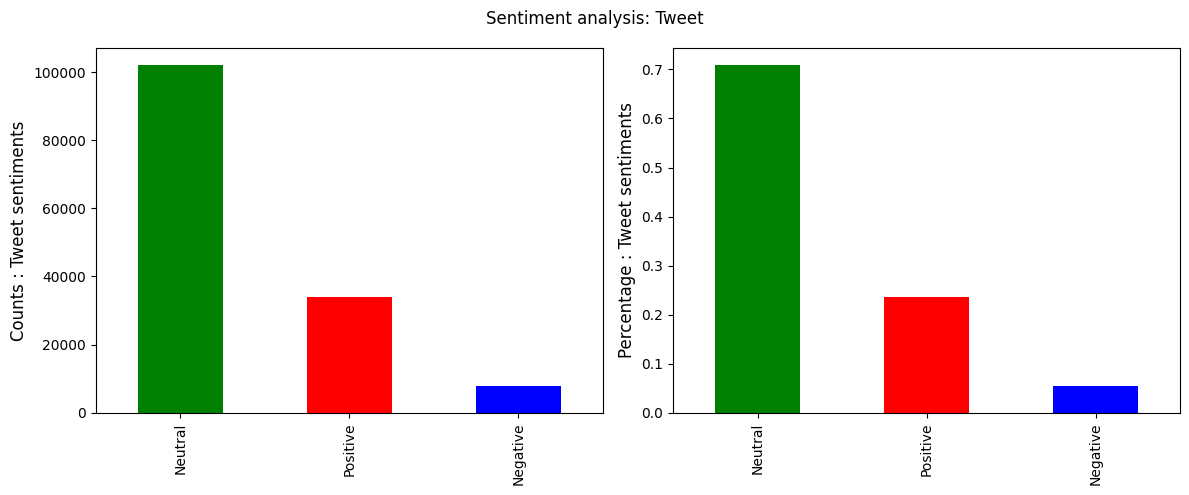

In [46]:
df['Sentiment'] = df['Tweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'Sentiment', 'Tweet')